In [11]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
#subprocess.run(["echo", "hi"], check=True, capture_output=True)
gisbase = subprocess.run(["grass78", "--config", "path"], check=True, shell=True, capture_output=True).stdout.decode('utf-8').strip()
print(gisbase)
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.script.setup as gsetup

# Create a GRASS GIS session.
rcfile = gsetup.init(gisbase, "data\\grassdata", "nc_spm_08_grass7", "user1")

# We want functions to raise exceptions and see standard output of the modules in the notebook.
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)
# Simply overwrite existing maps like we overwrite Python variable values.
os.environ['GRASS_OVERWRITE'] = '1'
# Enable map rendering in a notebook.
os.environ['GRASS_FONT'] = 'sans'
# Set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

C:\Program Files\GRASS GIS 7.8


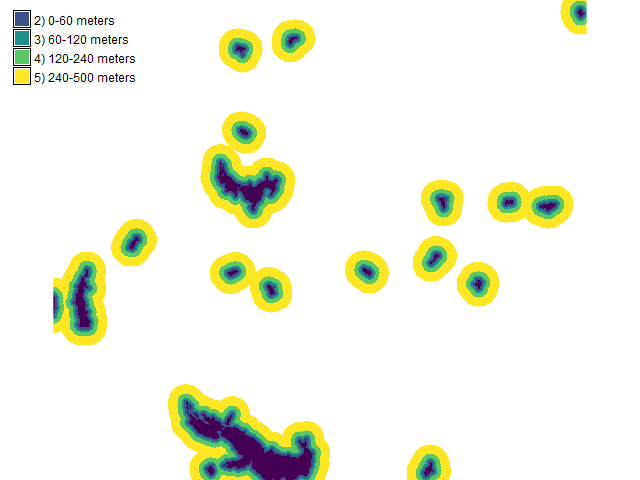

In [13]:
gs.parse_command('g.region', raster="lakes", flags='pg')
gs.run_command('r.buffer', input="lakes", output="lakes_buff", distances=[60, 120, 240, 500])
gs.run_command('d.erase')
gs.run_command('d.rast', map="lakes_buff")
gs.run_command('d.legend', raster="lakes_buff", range=(2, 5), at=(80, 100, 2, 10))
Image(filename="map.png")